# Problem 03.1:
### Previously in the ```Problem 02``` we resolved the problem about Iris Classification. 
### Now, we yet let continue in this dataset therefore we'll use the functions behind KNN-Algorithm but this isn't implementation by *Sckit-Learn*.   
* Dataset: [Iris](https://www.kaggle.com/uciml/iris)
* The objective of this problem is to classify iris plants into three species in this classic dataset

### Step by step:

## 1. Importing data and libraries:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None) # It's used to don't show the warnings...

filename = '/home/j/Personal/IA - Studies/3.MachineLearning-course/data-sets/Iris.csv'
iris_df = pd.read_csv(filename, index_col = 0)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Splitting and Stratifying the dataset:

In [32]:
iris_df = iris_df.sample(frac=1, random_state=36)
percent = 0.7

versicolorSet = iris_df[iris_df['Species'] == 'Iris-versicolor']
versicolorTrain, versicolorTest = versicolorSet.iloc[:int(percent * len(versicolorSet)),:], versicolorSet.iloc[int(percent * len(versicolorSet)):,:] # Going to the 40th index for the train, therefore 80% of dataset and after starting at 80% and going to the end
print(versicolorTrain.shape, versicolorTest.shape)

virginicaSet = iris_df[iris_df['Species'] == 'Iris-virginica']
virginicaTrain, virginicaTest = virginicaSet.iloc[:int(percent * len(virginicaSet)),:], virginicaSet.iloc[int(percent * len(virginicaSet)):,:]
print(virginicaTrain.shape, virginicaTest.shape)

setosaSet = iris_df[iris_df['Species'] == 'Iris-setosa']
setosaTrain, setosaTest = setosaSet.iloc[:int(percent * len(setosaSet)),:], setosaSet.iloc[int(percent * len(setosaSet)):,:]
print(setosaTrain.shape, setosaTest.shape)

train_set = pd.concat([versicolorTrain, virginicaTrain, setosaTrain], axis=0)
test_set  = pd.concat([versicolorTest, virginicaTest, setosaTest], axis=0)

(35, 5) (15, 5)
(35, 5) (15, 5)
(35, 5) (15, 5)


## 3. Splitting in X_train,X_test,y_train and y_test:

In [33]:
X_train = train_set.iloc[:,:4]
y_train = train_set.iloc[:,4:]

X_test = test_set.iloc[:,:4]
y_test = test_set.iloc[:,4:]

## 4. Standardizing label column:

In [34]:
y_train.value_counts()

Species        
Iris-setosa        35
Iris-versicolor    35
Iris-virginica     35
dtype: int64

In [35]:
y_train['Species'] = y_train.replace('Iris-versicolor', '0')
y_train['Species'] = y_train.replace('Iris-virginica', '1')
y_train['Species'] = y_train.replace('Iris-setosa', '2')

In [36]:
y_train.value_counts()

Species
0          35
1          35
2          35
dtype: int64

In [37]:
y_test.value_counts()

Species        
Iris-setosa        15
Iris-versicolor    15
Iris-virginica     15
dtype: int64

In [38]:
y_test['Species'] = y_test.replace('Iris-versicolor', '0')
y_test['Species'] = y_test.replace('Iris-virginica', '1')
y_test['Species'] = y_test.replace('Iris-setosa', '2')

In [39]:
y_test.value_counts()

Species
0          15
1          15
2          15
dtype: int64

## 5. Implementing KNN:

In [40]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
51,7.0,3.2,4.7,1.4
87,6.7,3.1,4.7,1.5
58,4.9,2.4,3.3,1.0
57,6.3,3.3,4.7,1.6
52,6.4,3.2,4.5,1.5


In [41]:
# Choosing two parameters
X_train['sepal_mean'] = X_train.iloc[:,:2].mean(axis = 1)
X_train['petal_mean'] = X_train.iloc[:,2:4].mean(axis = 1)
X_train['width_mean'] = X_train.loc[:,['SepalWidthCm', 'PetalWidthCm']].mean(axis = 1)
X_train['length_mean'] = X_train.loc[:,['SepalLengthCm', 'PetalLengthCm']].mean(axis = 1)

X_test['sepal_mean'] = X_test.iloc[:,:2].mean(axis = 1)
X_test['petal_mean'] = X_test.iloc[:,2:4].mean(axis = 1)
X_test['width_mean'] = X_test.loc[:,['SepalWidthCm', 'PetalWidthCm']].mean(axis = 1)
X_test['length_mean'] = X_test.loc[:,['SepalLengthCm', 'PetalLengthCm']].mean(axis = 1)

In [42]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,sepal_mean,petal_mean,width_mean,length_mean
Id,,,,,,,,
51,7.0,3.2,4.7,1.4,5.10,3.05,2.30,5.85
87,6.7,3.1,4.7,1.5,4.90,3.10,2.30,5.70
58,4.9,2.4,3.3,1.0,3.65,2.15,1.70,4.10
57,6.3,3.3,4.7,1.6,4.80,3.15,2.45,5.50
52,6.4,3.2,4.5,1.5,4.80,3.00,2.35,5.45


### 5.1 Ploting ```Sepal``` and ```Petal``` mean columns:

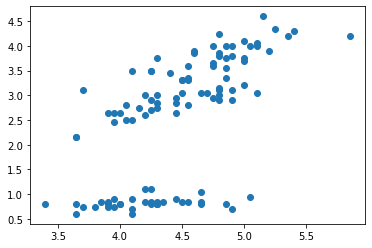

In [43]:
plt.scatter(X_train.iloc[:, 4], X_train.iloc[:, 5]);

### 5.2 Euclidian distance:

In [44]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

In [45]:
print(X_train.iloc[0,5]) # This point will be compared with all point in its column
euclidean_distances(X_train[['petal_mean', 'sepal_mean']], X_train.iloc[0,5]) # This function calculates the euclidian distance about one point

3.05


Id
51    2.050000
87    1.850676
58    1.081665
57    1.752855
52    1.750714
        ...   
48    2.405203
6     2.561250
41    2.550000
44    2.289651
33    2.760888
Length: 105, dtype: float64

### 5.3 Getting _k_ nearest neighbors of a point:

In [46]:
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(a = distances)
    return idx_sort.to_numpy()[:k]

In [47]:
row = np.array([X_train.iloc[0,4], X_train.iloc[0,5]])
get_neighbors(X_train[['petal_mean', 'sepal_mean']], row, 2)

array([49, 59])

##### This result means that the first nearest point is the point that in normal order has a 48º index, therefore the 49 number.

### 5.4 Classifying a new point:

In [48]:
def predict_classification(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y.to_numpy()[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    #print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

## 6. Testing the ```predict_classification```:

### 6.1 Calculating the mean, like the train test:

### 6.2 Using the prediction:

In [49]:
X_test.iloc[:,4:6].head()

,sepal_mean,petal_mean
Id,,
80,4.15,2.25
61,3.50,2.25
73,4.40,3.20
69,4.20,3.00
82,3.95,2.35


#### Testing the predict function:

In [50]:
X_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,sepal_mean,petal_mean,width_mean,length_mean
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.856190,3.075238,3.760952,1.227619,4.465714,2.494286,2.151429,4.808571
std,0.860783,0.430514,1.781934,0.790386,0.460211,1.276381,0.375478,1.282340
min,4.300000,2.200000,1.000000,0.100000,3.400000,0.600000,1.300000,2.700000
25%,5.100000,2.800000,1.500000,0.300000,4.100000,0.850000,1.850000,3.350000
50%,5.800000,3.000000,4.400000,1.300000,4.450000,2.900000,2.150000,5.050000
75%,6.500000,3.300000,5.100000,1.900000,4.800000,3.550000,2.400000,5.850000
max,7.900000,4.400000,6.900000,2.500000,5.850000,4.600000,3.050000,7.300000


In [57]:
to_test = X_test.loc[:,['PetalLengthCm','PetalWidthCm', 'length_mean', 'petal_mean']]
to_train = X_train.loc[:,['PetalLengthCm','PetalWidthCm', 'length_mean', 'petal_mean']]

### For _k_ equals 3:

In [83]:
results = []

for i in range(0,45):
    x = to_test.iloc[i,0]; y =   to_test.iloc[i,1] ; z = to_test.iloc[i,2] ; w = to_test.iloc[i,3]
    point = np.array([x,y,z,w])
    results.append(predict_classification(to_train, y_train, point, 3))
    
results = np.array(results); results = pd.DataFrame(results); results = results.rename(columns={0:"answer"})

# Measuring accuracy
acurracy = (results['answer'] == y_test['Species'].values).value_counts().to_list()
acurracy = acurracy[0] / (acurracy[0] + acurracy[1])
acurracy = round(acurracy*100, 2)

print(f'The acurracy of our model is {acurracy}%')

The acurracy of our model is 95.56%


### For _k_ equals 5:

In [81]:
results_2 = []

for i in range(0,45):
    x = to_test.iloc[i,0]; y =   to_test.iloc[i,1] ; z = to_test.iloc[i,2] ; w = to_test.iloc[i,3]
    point = np.array([x,y,z,w])
    results_2.append(predict_classification(to_train, y_train, point, 5))
    
results_2 = np.array(results); results_2 = pd.DataFrame(results); results_2 = results.rename(columns={0:"answer"})

# Measuring accuracy
acurracy_2 = (results_2['answer'] == y_test['Species'].values).value_counts().to_list()
acurracy_2 = acurracy_2[0] / (acurracy_2[0] + acurracy_2[1])
acurracy_2 = round(acurracy_2*100, 2)

print(f'The acurracy of our model is {acurracy_2}%')

The acurracy of our model is 95.56%
